# Check my LES run

In [16]:
%run functions_plotting.py

## select (grayed out) simulations to plot
sim_keyword_gray = 'dharma/sandbox'

## select LES run(s) of interest
sim_keyword_col = 'WRF_Lx25km_dx100_FixN.'

In [14]:
vars_mean_list = pd.read_excel('https://docs.google.com/spreadsheets/d/1Vl8jYGviet7EtXZuQiitrx4NSkV1x27aJAhxxjBb9zI/export?gid=0&format=xlsx',
                              sheet_name='Mean')
var_vec_1d = np.asarray(vars_mean_list.variable_id[vars_mean_list.dimensions == 'time'])
var_vec_2d = np.asarray(vars_mean_list.variable_id[vars_mean_list.dimensions == 'time, height'])

In [17]:
## load all simulations located in subfolders of the given directory
df_gray_1d,df_gray_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_gray,make_gray = 1)

df_col_1d,df_col_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_col)

Loading variables: f(time)
../../output_les/dharma/sandbox/DHARMA_Lx25km_dx100_ProgNa.nc
../../output_les/dharma/sandbox/DHARMA_Lx25km_dx100_FixN.nc
Loading variables: f(time,height)
../../output_les/dharma/sandbox/DHARMA_Lx25km_dx100_ProgNa.nc
../../output_les/dharma/sandbox/DHARMA_Lx25km_dx100_FixN.nc
Loading variables: f(time)
../../output_les/wrf/sandbox/WRF_Lx25km_dx100_FixN.nc
Loading variables: f(time,height)
../../output_les/wrf/sandbox/WRF_Lx25km_dx100_FixN.nc


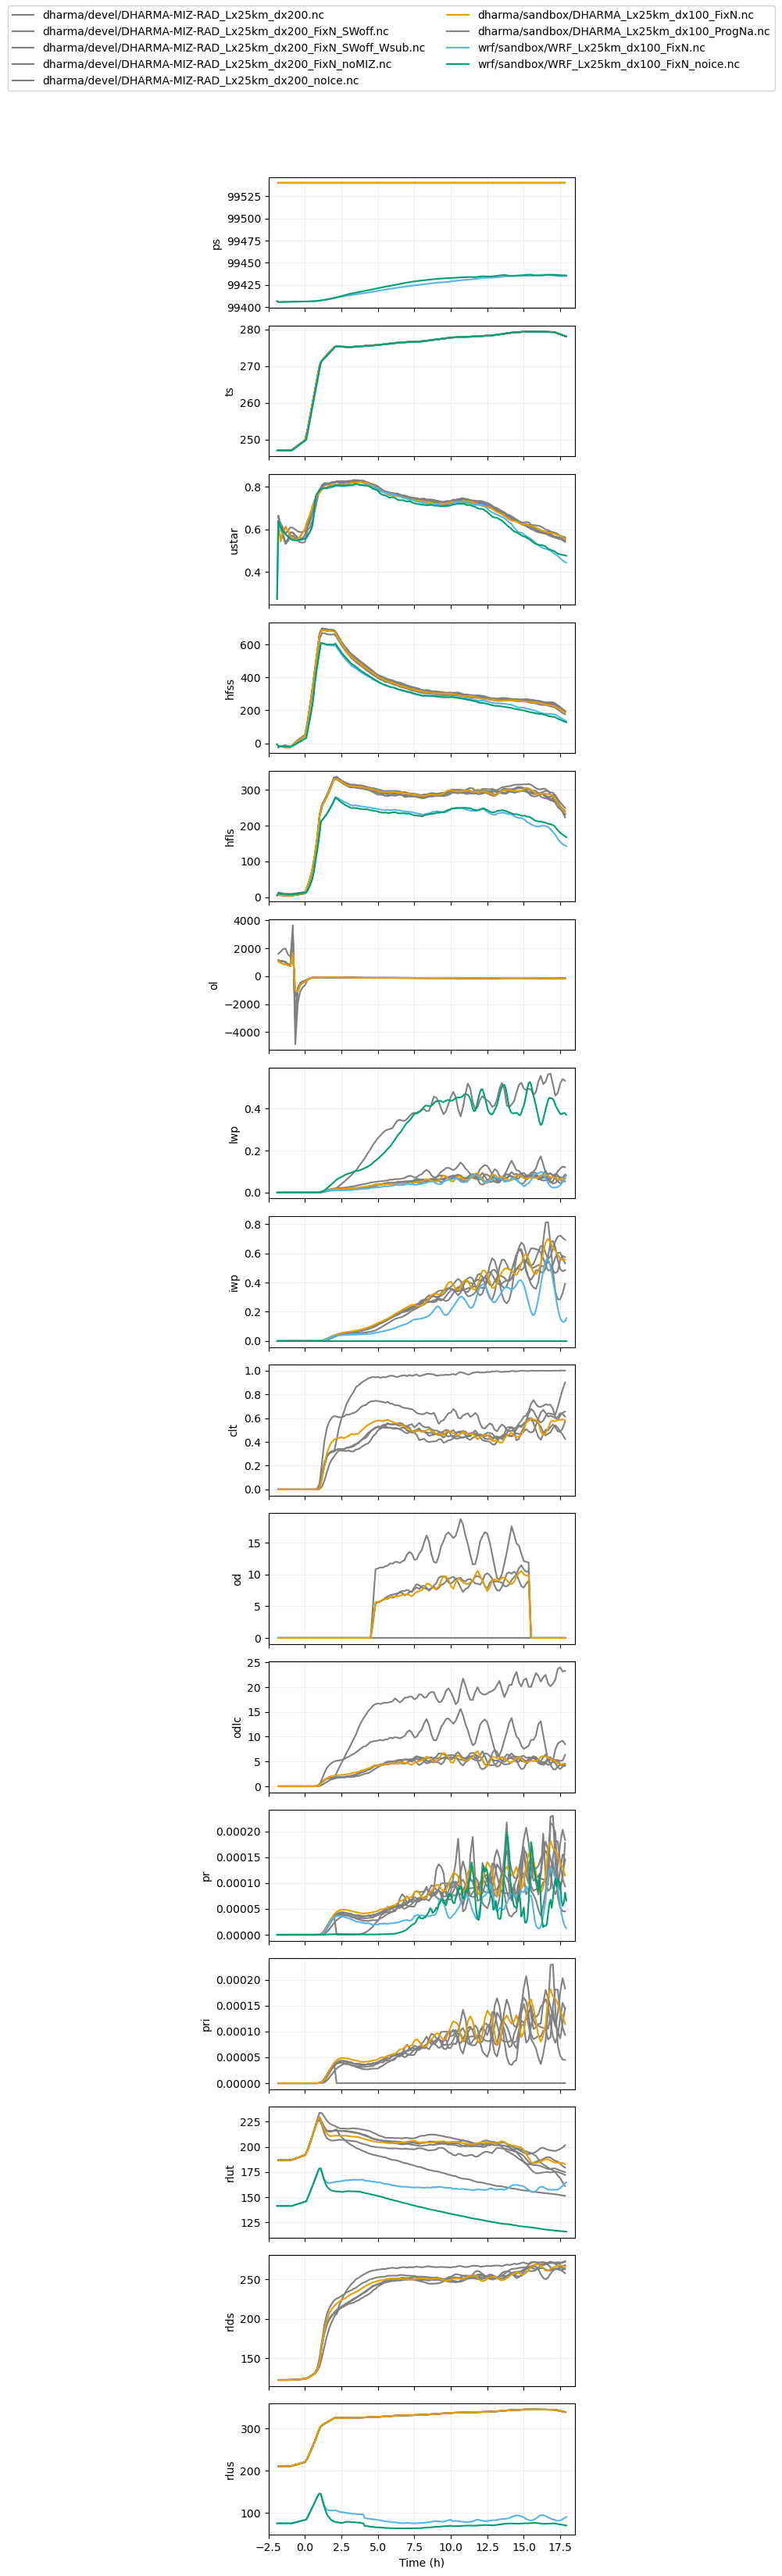

In [8]:
## plot variables that have only time dependence
plot_1d(pd.concat([df_gray_1d,df_col_1d]),var_vec_1d)

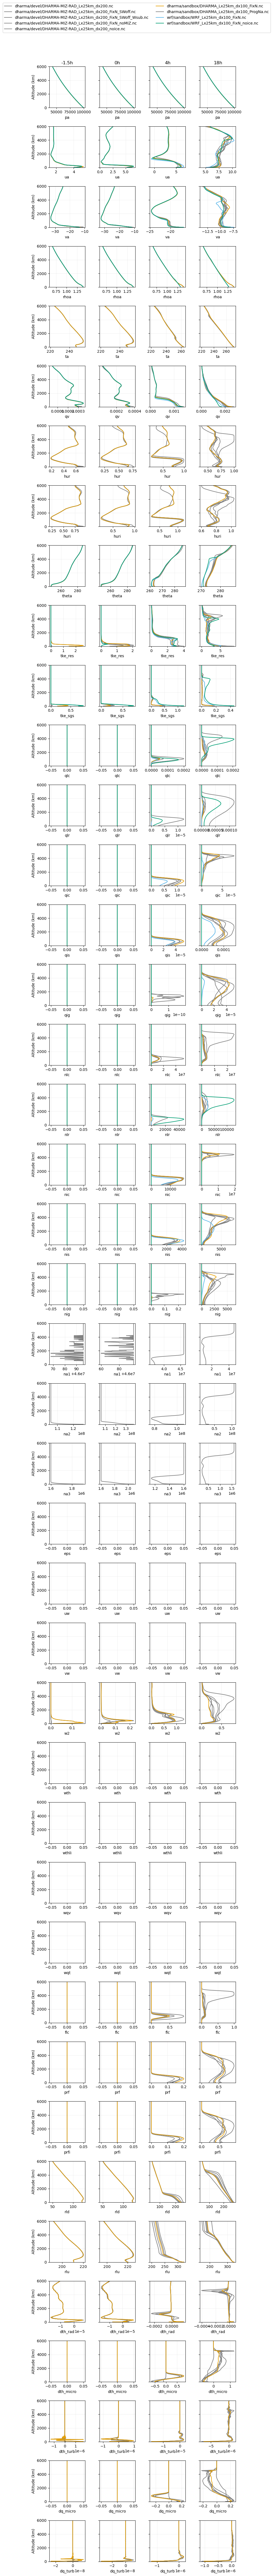

<Figure size 1000x600 with 0 Axes>

In [9]:
## example where ERA5 and radiosonde are included
plot_2d(pd.concat([df_gray_2d,df_col_2d]),var_vec = var_vec_2d,times=[-1.5,0,4,18],z_max=6000)